## Caso Práctico:
- Analizar qué variables principales (edades, plataforma favorita, tiempo en sesión promedio,etc..) Presentan ciertos rangos de tickets de compra. Ejemplo el Ticket de compra X tiene como Tipo de Pago favorito "App", las edades promedio, mínima y máxima son de ... 

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_excel("TRANSACTIONAL_EVENTO2023.xlsx")

print(data.head())

   Transaction Id  Ticket de Compra  Edad Plataforma  Tiempo en Sesion  \
0               1             10698    27     Pagina                62   
1               2              6868    29        App                44   
2               3             10929    33        App                34   
3               4              7100    32     Pagina                14   
4               5             19047    35        App                 6   

  Tipo de Pago  Paginas Vistas    CTR  
0       Debito               5  0.114  
1      Credito               8  0.153  
2      Credito               2  0.175  
3       Debito               5  0.209  
4      Credito               4  0.172  


In [246]:
#revisar si hay celdas en blanco
print(data.isnull().sum())

Transaction Id      0
Ticket de Compra    0
Edad                0
Plataforma          0
Tiempo en Sesion    0
Tipo de Pago        0
Paginas Vistas      0
CTR                 0
dtype: int64


In [247]:
data_sorted = data.sort_values(by='Ticket de Compra', ascending=False)

data_sorted.head()

,Transaction Id,Ticket de Compra,Edad,Plataforma,Tiempo en Sesion,Tipo de Pago,Paginas Vistas,CTR
1356,1357,19991,24,App,29,Promo Bancaria,5,0.1050
105,106,19989,40,App,34,Debito,1,0.2330
1783,1784,19985,30,App,15,Credito,1,0.1000
1091,1092,19981,39,App,15,Credito,5,0.0912
1917,1918,19979,40,App,12,Debito,4,0.1760


In [248]:
# Obtener los valores únicos en la columna 'Tipo de Pago'

valores_unicos = data['Tipo de Pago'].unique()

# Imprimir los valores únicos
print("Valores únicos en la columna 'Tipo de Pago':")
print(valores_unicos)

Valores únicos en la columna 'Tipo de Pago':
['Debito' 'Credito' 'Promo Bancaria']


In [249]:
# Valores promedios, más y menos frecuentes para la columna Ticket de Compra

# Valor más bajo y cuántas veces aparece
min_value = data['Ticket de Compra'].min()
min_count = (data['Ticket de Compra'] == min_value).sum()

# Valor más alto y cuántas veces aparece
max_value = data['Ticket de Compra'].max()
max_count = (data['Ticket de Compra'] == max_value).sum()

# Valor en posición central (Mediana) y cuántas veces aparece
#median_value = data['Ticket de Compra'].median()
#median_count = (data['Ticket de Compra'] == median_value).sum()

# Valor promedio y cuántas veces aparece
mean_value = data['Ticket de Compra'].mean()
mean_count = (data['Ticket de Compra'] == mean_value).sum()

# Mostrar los resultados
print(f"Valor más bajo: {min_value}, Aparece {min_count} veces")
print(f"Valor más alto: {max_value}, Aparece {max_count} veces")
#print(f"Valor Mediana (posición central): {median_value}, Aparece {median_count} veces")
print(f"Valor promedio: {mean_value}, Aparece {mean_count} veces")


Valor más bajo: 4003, Aparece 1 veces
Valor más alto: 19991, Aparece 1 veces
Valor promedio: 12073.547, Aparece 0 veces


In [250]:
# El objetivo es analizar qué variables principales (edades, plataforma favorita, tiempo en sesión promedio,etc..)
# Presentan ciertos rangos de tickets de compra 

C:\Users\rou_27\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\rou_27\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\rou_27\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\rou_27\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\rou_27\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default val

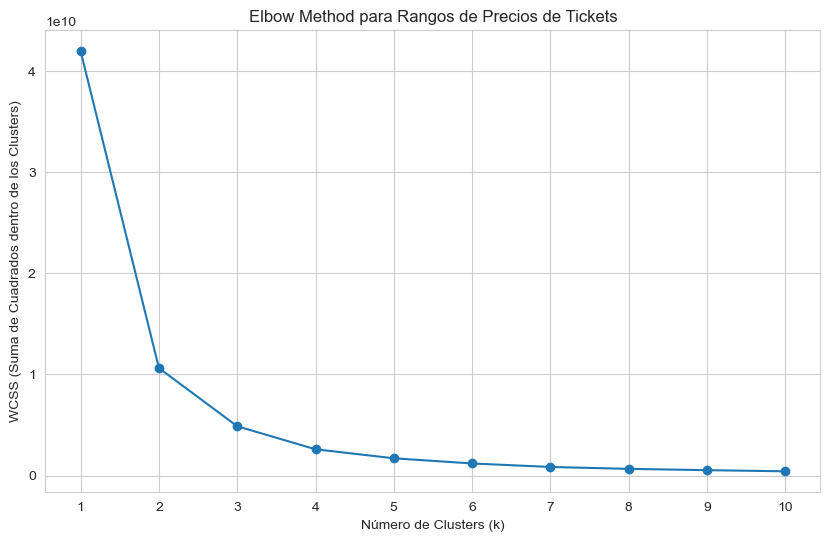

In [251]:
# Ver de manera visual cuántos grupos deberíamos tener (x4) 

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista para almacenar los valores de WCSS
wcss_values = []

# Calcular WCSS para diferentes valores de k (número de clusters)
for k in range(1, 11):  # Probamos desde 1 hasta 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data['Ticket de Compra'].values.reshape(-1, 1))
    wcss_values.append(kmeans.inertia_)

# Graficar el codo (elbow)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_values, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Suma de Cuadrados dentro de los Clusters)')
plt.title('Elbow Method para Rangos de Precios de Tickets')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [252]:
# 1) SEPARAR EL DATA EN 2 CUARTILES

# Calcular los cuantiles para dividir los datos en cuatro grupos

#q1 = data['Ticket de Compra'].quantile(0.35)
#q2 = data['Ticket de Compra'].quantile(0.70)

# Asignar cada valor de Ticket de Compra a un rango específico basado en los cuantiles

#def asignar_rango(ticket):
#    if ticket <= q1:
#        return 'Bajo'
#    elif ticket <= q2:
#        return 'Medio'
#    else:
#        return 'Alto'

#data['Rango'] = data['Ticket de Compra'].apply(asignar_rango)

# Mostrar los cuantiles y sus rangos correspondientes

#print(f"Cuantil 0.35: {q1}")
#print(f"Cuantil 0.70: {q2}")

In [253]:
# 2) AGREGAR A QUE CUARTIL PERTENECEN COMO NUEVA COLUMNA

# Cuantiles obtenidos previamente
#q1 = 9733.85
#q2 = 15141.2

# Asignar cada valor de Ticket de Compra a un rango específico basado en los cuantiles
#def asignar_rango(ticket):
#    if ticket >= 4000 and ticket <= 10000:
#        return 'Bajo'
#    elif ticket > 10000 and ticket <= 15000:
#        return 'Medio'
#    else:
#        return 'Alto'

# Crear una nueva columna 'Rango' con los valores correspondientes
#data['Rango'] = data['Ticket de Compra'].apply(asignar_rango)

# Mostrar el DataFrame con la nueva columna 'Rango'
#print(data.head())

In [254]:
# Quiero separar en 4 grupos de compradores: Tickets bajos, medio, alto y premium

# Calcular los cuartiles de los valores de Ticket de Compra
q1 = data['Ticket de Compra'].quantile(0.25)
q2 = data['Ticket de Compra'].quantile(0.5)
q3 = data['Ticket de Compra'].quantile(0.75)

# Definir los límites de los rangos usando los cuartiles
limite_bajo = q1
limite_medio = q2
limite_alto = q3

# Asignar cada valor de Ticket de Compra a un rango específico basado en los límites
def asignar_rango(ticket):
    if ticket <= limite_bajo:
        return 'Bajo'
    elif ticket <= limite_medio:
        return 'Medio'
    else:
        return 'Alto'

data['Rango'] = data['Ticket de Compra'].apply(asignar_rango)

# Mostrar los límites de los rangos
print(f"Límite del rango Bajo: {limite_bajo}")
print(f"Límite del rango Medio: {limite_medio}")
print(f"Límite del rango Alto: {limite_alto}")


Límite del rango Bajo: 8111.5
Límite del rango Medio: 12199.5
Límite del rango Alto: 15917.0


Tengo los siguientes Rangos de Tickets:

- Ticket Bajo 0 a 8000
- Ticket Medio 8001 a 12000
- Ticket Alto 12001 a 15000
- Ticket Premium 15001 a 20000

In [255]:
# 3) Agregar la nueva columna a mi dataframe


# Crear las condiciones para cada rango
condiciones = [
    (data['Ticket de Compra'] >= 4000) & (data['Ticket de Compra'] <= 8000),
    (data['Ticket de Compra'] >= 8001) & (data['Ticket de Compra'] <= 12000),
    (data['Ticket de Compra'] >= 12001) & (data['Ticket de Compra'] <= 15000),
    (data['Ticket de Compra'] >= 15001) & (data['Ticket de Compra'] <= 20000)
]

# Asignar etiquetas a cada rango
etiquetas = ['Ticket Bajo (4000 a 8000)', 'Ticket Medio(8001 a 12000)', 'Ticket Alto (12001 a 15000)', 'Ticket Premium(15001 a 20000)']

# Crear una nueva columna 'Rango' con los valores correspondientes
data['Rango'] = np.select(condiciones, etiquetas, default='Otro')

# Mostrar el DataFrame con la nueva columna 'Rango'
print(data.head())

   Transaction Id  Ticket de Compra  Edad Plataforma  Tiempo en Sesion  \
0               1             10698    27     Pagina                62   
1               2              6868    29        App                44   
2               3             10929    33        App                34   
3               4              7100    32     Pagina                14   
4               5             19047    35        App                 6   

  Tipo de Pago  Paginas Vistas    CTR                          Rango  
0       Debito               5  0.114     Ticket Medio(8001 a 12000)  
1      Credito               8  0.153      Ticket Bajo (4000 a 8000)  
2      Credito               2  0.175     Ticket Medio(8001 a 12000)  
3       Debito               5  0.209      Ticket Bajo (4000 a 8000)  
4      Credito               4  0.172  Ticket Premium(15001 a 20000)  


In [256]:
data_info = data.dtypes.to_frame().reset_index()
data_info.columns = ['Column', 'Dtype']
print(data_info)

             Column    Dtype
0    Transaction Id    int64
1  Ticket de Compra    int64
2              Edad    int64
3        Plataforma   object
4  Tiempo en Sesion    int64
5      Tipo de Pago   object
6    Paginas Vistas    int64
7               CTR  float64
8             Rango   object


In [257]:
import pandas as pd

# Calcular el conteo de ocurrencias de cada valor en la columna 'Rango'
conteo_rango = data['Rango'].value_counts()

# Obtener el número total de tickets
total_tickets = len(data)

# Calcular el porcentaje de frecuencia para cada rango
porcentaje_frecuencia = (conteo_rango / total_tickets) * 100

# Calcular la frecuencia acumulada y el porcentaje de frecuencia acumulada
frecuencia_acumulada = conteo_rango.cumsum()
porcentaje_frecuencia_acumulada = (frecuencia_acumulada / total_tickets) * 100

# Crear un DataFrame para la distribución de frecuencia
df_frecuencia = pd.DataFrame({
    'Rango': conteo_rango.index,
    'Frecuencia': conteo_rango.values,
    'Porcentaje (%)': porcentaje_frecuencia.values,
    'Frecuencia Acumulada': frecuencia_acumulada.values,
    'Frecuencia Acumulada (%)': porcentaje_frecuencia_acumulada.values
})

# Ordenar el DataFrame por la frecuencia en orden descendente
df_frecuencia = df_frecuencia.sort_values(by='Frecuencia', ascending=False)

# Imprimir la distribución de frecuencia como tabla
print("Distribución de frecuencia de mayor a menor:")
print(df_frecuencia.to_string(index=False))

# Imprimir el número total de tickets
print("\nNúmero total de tickets:", total_tickets)


Distribución de frecuencia de mayor a menor:
                        Rango  Frecuencia  Porcentaje (%)  Frecuencia Acumulada  Frecuencia Acumulada (%)
Ticket Premium(15001 a 20000)         612           30.60                   612                     30.60
   Ticket Medio(8001 a 12000)         495           24.75                  1107                     55.35
    Ticket Bajo (4000 a 8000)         487           24.35                  1594                     79.70
  Ticket Alto (12001 a 15000)         406           20.30                  2000                    100.00

Número total de tickets: 2000


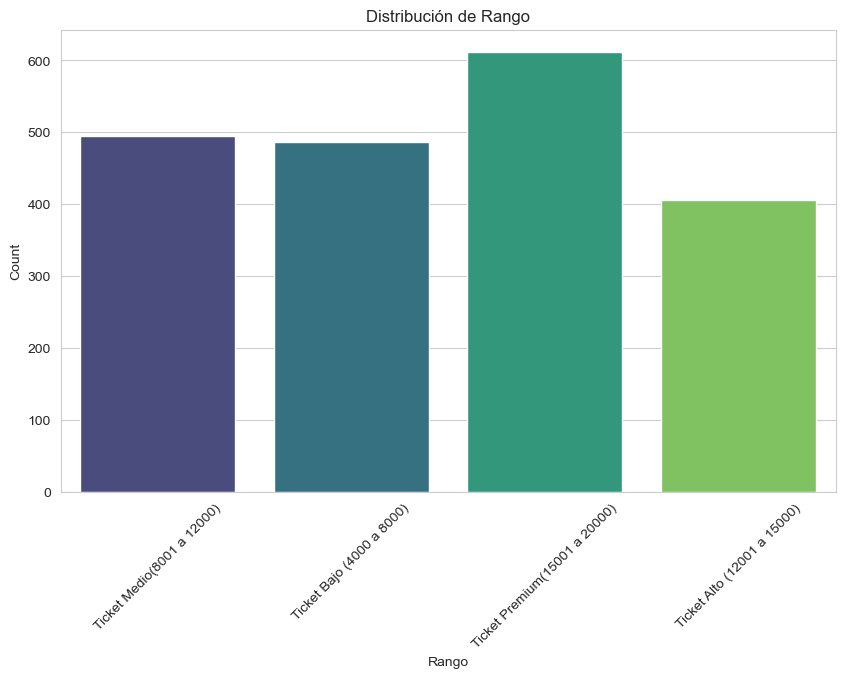

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de barras para visualizar la distribución de las categorías en 'Rango'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Rango', palette='viridis')
plt.title('Distribución de Rango')
plt.xlabel('Rango')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Imprimir el conteo de ocurrencias de cada categoría
#for index, value in enumerate(data['Rango'].value_counts()):
#    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=10)

# Imprimir el conteo total de ocurrencias debajo del gráfico
#total_counts = len(data['Rango'])
#plt.text(0, -20, f'Total: {total_counts}', ha='center', fontsize=12, weight='bold')

plt.show()

In [259]:
# ESTADISTICAS | QUE CARACTERÍSTICAS PRESENTAN NUESTROS DISTINTOS RANGOS DE TICKETS (VARIABLES NUMÉRICAS)

# Define los rangos de ticket
rango_bajo = (4000, 8000)
rango_medio = (8001, 12000)
rango_alto = (12001, 15000)
rango_premium = (15001, 20000)


# Filtra el DataFrame para cada rango de ticket
data_bajo = data[(data['Ticket de Compra'] >= rango_bajo[0]) & (data['Ticket de Compra'] <= rango_bajo[1])]
data_medio = data[(data['Ticket de Compra'] >= rango_medio[0]) & (data['Ticket de Compra'] <= rango_medio[1])]
data_alto = data[(data['Ticket de Compra'] >= rango_alto[0]) & (data['Ticket de Compra'] <= rango_alto[1])]
data_premium = data[(data['Ticket de Compra'] >= rango_premium[0]) & (data['Ticket de Compra'] <= rango_premium[1])]

# Calcula las estadísticas descriptivas para cada grupo
estadisticas_bajo = data_bajo[['Paginas Vistas', 'CTR']].describe()
estadisticas_medio = data_medio[['Paginas Vistas', 'CTR']].describe()
estadisticas_alto = data_alto[['Paginas Vistas', 'CTR']].describe()
estadisticas_premium = data_premium[['Paginas Vistas', 'CTR']].describe()

# Imprime las estadísticas descriptivas
print("Estadísticas para Ticket Bajo:")
print(estadisticas_bajo)
print("\nEstadísticas para Ticket Medio:")
print(estadisticas_medio)
print("\nEstadísticas para Ticket Alto:")
print(estadisticas_alto)
print("\nEstadísticas para Ticket Premium:")
print(estadisticas_premium)


Estadísticas para Ticket Bajo:
       Paginas Vistas         CTR
count      487.000000  487.000000
mean         4.110883    0.117661
std          1.555564    0.066417
min          1.000000    0.000000
25%          3.000000    0.059100
50%          4.000000    0.119200
75%          5.000000    0.171600
max          8.000000    0.249000

Estadísticas para Ticket Medio:
       Paginas Vistas         CTR
count      495.000000  495.000000
mean         4.010101    0.118974
std          1.462728    0.068154
min          1.000000    0.000000
25%          3.000000    0.061000
50%          4.000000    0.118400
75%          5.000000    0.175100
max          8.000000    0.250000

Estadísticas para Ticket Alto:
       Paginas Vistas         CTR
count      406.000000  406.000000
mean         4.014778    0.113699
std          1.582240    0.066172
min          1.000000    0.000000
25%          3.000000    0.062000
50%          4.000000    0.117200
75%          5.000000    0.161750
max          8.00000

In [273]:
# ESTADISTICAS | QUE CARACTERÍSTICAS PRESENTAN NUESTROS DISTINTOS RANGOS DE TICKETS (VARIABLES DE TEXTO)

# Define los rangos de ticket
rango_bajo = (4000, 8000)
rango_medio = (8001, 12000)
rango_alto = (12001, 15000)
rango_premium = (15001, 20000)

# Filtra el DataFrame para cada rango de ticket
data_bajo = data[(data['Ticket de Compra'] >= rango_bajo[0]) & (data['Ticket de Compra'] <= rango_bajo[1])]
data_medio = data[(data['Ticket de Compra'] >= rango_medio[0]) & (data['Ticket de Compra'] <= rango_medio[1])]
data_alto = data[(data['Ticket de Compra'] >= rango_alto[0]) & (data['Ticket de Compra'] <= rango_alto[1])]
data_premium = data[(data['Ticket de Compra'] >= rango_premium[0]) & (data['Ticket de Compra'] <= rango_premium[1])]

def obtener_estadisticas_object(data_group):
    stats = {}
    for col in data_group.select_dtypes(include=['object']).columns:
        value_counts = data_group[col].value_counts()
        most_common = value_counts.idxmax()
        least_common = value_counts.idxmin()
        suma_usos = value_counts[most_common] + value_counts[least_common]  # Suma entre el valor más y menos usado
        stats[col] = {
            'Valor más usado': most_common,
            'Frecuencia más usada': value_counts.max(),
            'Valor menos usado': least_common,
            'Frecuencia menos usada': value_counts.min(),
            'Suma entre valor más y menos usado': suma_usos,
            'Valor promedio': value_counts.mean(),
            'Total de filas': len(data_group)  # Total de filas en el grupo',
    
        }
    return pd.DataFrame(stats)

# Obtener estadísticas para cada grupo
estadisticas_bajo_obj = obtener_estadisticas_object(data_bajo)
estadisticas_medio_obj = obtener_estadisticas_object(data_medio)
estadisticas_alto_obj = obtener_estadisticas_object(data_alto)
estadisticas_premium_obj = obtener_estadisticas_object(data_premium)

# Imprimir las estadísticas obtenidas
print("Estadísticas para Ticket Bajo - Columnas Object:")
print(estadisticas_bajo_obj)
print("\nEstadísticas para Ticket Medio - Columnas Object:")
print(estadisticas_medio_obj)
print("\nEstadísticas para Ticket Alto - Columnas Object:")
print(estadisticas_alto_obj)
print("\nEstadísticas para Ticket Premium - Columnas Object:")
print(estadisticas_premium_obj)

Estadísticas para Ticket Bajo - Columnas Object:
                                   Plataforma Tipo de Pago  \
Valor más usado                           App      Credito   
Frecuencia más usada                      338          280   
Valor menos usado                      Pagina       Debito   
Frecuencia menos usada                    149           72   
Suma entre valor más y menos usado        487          352   
Valor promedio                          243.5   162.333333   
Total de filas                            487          487   

                                                        Rango  
Valor más usado                     Ticket Bajo (4000 a 8000)  
Frecuencia más usada                                      487  
Valor menos usado                   Ticket Bajo (4000 a 8000)  
Frecuencia menos usada                                    487  
Suma entre valor más y menos usado                        974  
Valor promedio                                          487.0  
Total 